# Muliclass-Logistic Regression

# Logistic Regression for multiclass classification

Logistic regression is inherently a binary classification algorithm, meaning it is designed to predict one of two classes. However, there are techniques to extend logistic regression for multiclass classification problems. One common approach is the "One-vs-Rest" (OvR) or "One-vs-All" (OvA) strategy.

A lot of classification models like logistic regression were originally designed for binary classification, that is predicting whether something is one thing or another. For datasets with more than two classes, what do you do? For multiclass classification problems, one approach is to split the task into multiple binary classification datasets and fit a binary classification model on each. In this lecture, we will explore the One-vs-Rest strategy and how you can apply it to logisitic regression using Scikit-Learn.

# One-vs-Rest
One Versus Rest (OvR), which is also called one versus all (OvA) is a technique that extends binary classifiers to multi-class problems. Here is how it works:

You train one classifier per class, where one class is treated as the positive class and the other classes are considered negative classes.
For example, say you have an image recogition task. Your dataset has 4 classes, the digits 0, 1, 2, and 3. Your goal is to classify them. Using the one versus rest approach, you break down the task into 4 binary classification problems.

Binary Classification Problem 1: digit 0 vs digits 1, 2, and 3

Binary Classification Problem 2: digit 1 vs digits 0, 2, and 3

Binary Classification Problem 3: digit 2 vs digits 0, 1, and 3

Binary Classification Problem 4: digit 3 vs digits 0, 1, and 2

From there, if you want to classify a new sample, you would use each of the classifiers. The model that predicts the highest class probability is the predicted class.

# Simple explanation
In multiclass logistic regression,it will create 4 class in here cause label column has only 4 unique values like(0,1,2,3)
then algorithm check the pixel values and compare those pixel is matching with those 4 classes.if it is matching with one class it will give that class label values.
example if 1 is matching means,it will provide 1class label value.

# Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

The code below loads a modified version of the digits dataset which is arranged in a csv file for convenience. The data consists of pixel intensity values for 720 images that are 8 by 8 pixels. Each image is labeled with a number from 0-4.

In [309]:
df=pd.read_csv("modifiedDigits4Classes.csv")

In [310]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0


In [311]:
df.shape

(720, 65)

In [312]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
715,0,0,6,12,12,6,0,0,0,0,...,0,0,0,2,11,10,4,0,0,1
716,0,3,14,15,6,0,0,0,0,7,...,0,0,4,15,13,12,11,1,0,2
717,0,1,10,13,2,0,0,0,0,10,...,0,0,0,9,13,11,10,9,0,2
718,0,0,15,13,1,0,0,0,0,0,...,0,0,0,10,13,10,6,2,0,2
719,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       720 non-null    int64
 1   1       720 non-null    int64
 2   2       720 non-null    int64
 3   3       720 non-null    int64
 4   4       720 non-null    int64
 5   5       720 non-null    int64
 6   6       720 non-null    int64
 7   7       720 non-null    int64
 8   8       720 non-null    int64
 9   9       720 non-null    int64
 10  10      720 non-null    int64
 11  11      720 non-null    int64
 12  12      720 non-null    int64
 13  13      720 non-null    int64
 14  14      720 non-null    int64
 15  15      720 non-null    int64
 16  16      720 non-null    int64
 17  17      720 non-null    int64
 18  18      720 non-null    int64
 19  19      720 non-null    int64
 20  20      720 non-null    int64
 21  21      720 non-null    int64
 22  22      720 non-null    int64
 23  23      720 non

In [314]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
count,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.0,0.401389,6.163889,12.654167,11.405556,4.747222,0.486111,0.001389,0.005556,2.609722,...,0.354167,0.001389,0.362500,6.444444,12.819444,13.363889,8.616667,3.169444,0.869444,1.506944
std,0.0,0.951537,4.775439,4.240163,4.405960,5.019849,1.594436,0.037268,0.091181,3.633665,...,1.316783,0.037268,1.027025,5.145420,4.281559,3.040904,5.328721,5.128844,2.848938,1.120032
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,2.000000,12.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,12.000000,12.000000,4.000000,0.000000,0.000000,1.000000
50%,0.0,0.000000,6.000000,14.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,14.000000,14.000000,9.000000,0.000000,0.000000,1.500000
75%,0.0,0.000000,10.000000,16.000000,15.000000,8.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,11.000000,16.000000,16.000000,13.000000,4.000000,0.000000,3.000000
max,0.0,6.000000,16.000000,16.000000,16.000000,16.000000,15.000000,1.000000,2.000000,15.000000,...,13.000000,1.000000,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,3.000000


In [315]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', 'label'],
      dtype='object')

In [316]:
#counting the value of label columns values
df['label'].value_counts()

3    183
1    182
0    178
2    177
Name: label, dtype: int64

# Visualize Each Digit

In [317]:
pixel_columns=df.columns[:-1]#we are taking all the columns except label column

In [318]:
pixel_columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [319]:
# Get all columns except the label column for the first image
#image_values=df.iloc[0,0:-1].values
#or
image_values=df.loc[0,pixel_columns].values

In [320]:
image_values

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0], dtype=int64)

In [321]:
#change image values 8*8 matrix
image_values.reshape(8,8)

array([[ 0,  0,  5, 13,  9,  1,  0,  0],
       [ 0,  0, 13, 15, 10, 15,  5,  0],
       [ 0,  3, 15,  2,  0, 11,  8,  0],
       [ 0,  4, 12,  0,  0,  8,  8,  0],
       [ 0,  5,  8,  0,  0,  9,  8,  0],
       [ 0,  4, 11,  0,  1, 12,  7,  0],
       [ 0,  2, 14,  5, 10, 12,  0,  0],
       [ 0,  0,  6, 13, 10,  0,  0,  0]], dtype=int64)

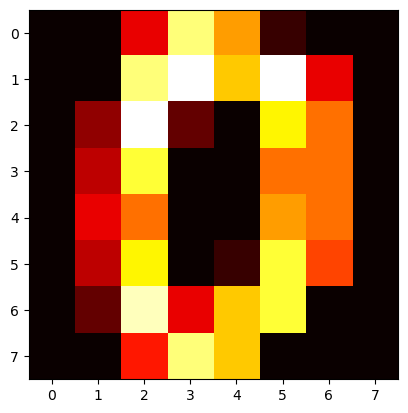

In [322]:
#displaying pixel values image using matplot lib imshow() function
plt.imshow(image_values.reshape(8,8),cmap='hot')

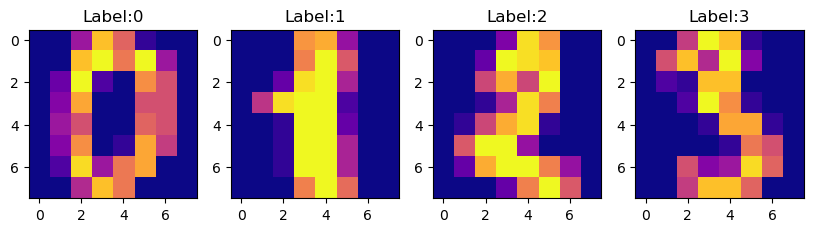

In [323]:
#draw the first 4 rows image
plt.figure(figsize=(10,12))
for i in range(0,4):
    plt.subplot(1,4,1+i)
    img_values=df.loc[i,pixel_columns].values
    img_label=df.loc[i,'label']
    plt.imshow(img_values.reshape(8,8),cmap='plasma')
    plt.title('Label:'+str(img_label))

# Splitting Data into Training and Test Sets

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
x_train,x_test,y_train,y_test=train_test_split(df[pixel_columns],df['label'],test_size=0.25,random_state=0)

In [326]:
y_train

109    1
700    2
101    2
499    3
319    2
      ..
707    3
192    1
629    2
559    1
684    1
Name: label, Length: 540, dtype: int64

# Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's StandardScaler helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [327]:
from sklearn.preprocessing import StandardScaler

In [328]:
stan=StandardScaler()
# Fit on training set only.
#stan.fit(x_train)
# Apply transform to both the training set and the test set.
x_train=stan.fit_transform(x_train)
x_test=stan.fit_transform(x_test)

In [329]:
x_train

array([[ 0.        , -0.44164163, -1.31139693, ...,  0.26893013,
        -0.61146785, -0.29725387],
       [ 0.        ,  1.5374993 ,  0.96296738, ..., -1.61952591,
        -0.61146785, -0.29725387],
       [ 0.        ,  1.5374993 ,  1.79000895, ...,  0.08008452,
        -0.41231668, -0.29725387],
       ...,
       [ 0.        , -0.44164163, -0.89787615, ..., -1.61952591,
         0.384288  ,  1.16199242],
       [ 0.        , -0.44164163, -0.89787615, ..., -1.61952591,
        -0.61146785, -0.29725387],
       [ 0.        , -0.44164163, -1.10463654, ...,  0.08008452,
        -0.61146785, -0.29725387]])

# Logistic Regression

In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
# multi_class is specifying one versus rest
clf=LogisticRegression(multi_class='ovr',random_state=0)#ovr-one vs rest
clf.fit(x_train,y_train)
print("Test Accuracy:",clf.score(x_train,y_train))
print("Train Accuracy:",clf.score(x_test,y_test))

Test Accuracy: 1.0
Train Accuracy: 1.0


Both the training and test accuracies are very high. If you access the intercept terms by using the intercept_ attribute, you can see that the array has four values. Since the Logistic Regression instance was fit on a multiclass dataset via the OvR approach, the first intercept belongs to the model that fits digit 0 versus digits 1,2, and 3. The second value is the intercept of the model that fits digit 1 versus digits 0,2, and 3. Etc.

In [332]:
clf.intercept_#4 classs that's why 4 intercept created

array([-5.03829065, -6.10080072, -4.45172253, -3.57242627])

In [333]:
clf.coef_#coefficient was created for each class(0,1,2,3) and every row

array([[ 0.00000000e+00, -5.26951755e-02, -1.74959277e-01,
         1.09456884e-02, -1.22637187e-01, -4.49848044e-01,
        -3.00373617e-01, -2.03362314e-04, -1.82580517e-04,
        -6.65915492e-03,  1.75632951e-02,  1.76975555e-01,
        -1.91230624e-01,  1.87749448e-03, -5.99739851e-02,
        -2.77550008e-03, -1.01150944e-01,  1.33421582e-01,
         4.84271369e-01, -1.87600915e-01, -8.76036215e-01,
         2.83500104e-01,  1.47404310e-01,  0.00000000e+00,
        -1.12556561e-01,  3.26040242e-01,  5.94126829e-01,
        -3.13711067e-01, -9.02839650e-01,  1.79816036e-01,
         5.81666259e-01,  0.00000000e+00,  0.00000000e+00,
         5.20585263e-01,  6.39954748e-01, -2.62723896e-01,
        -6.05677581e-01,  1.51748391e-02,  4.16356800e-01,
         0.00000000e+00,  0.00000000e+00,  1.93405587e-01,
         4.37191044e-01, -3.03073817e-01, -1.85971104e-01,
         2.10005828e-01,  2.33793105e-01, -2.94048371e-03,
        -1.18320833e-02, -4.64261807e-02,  1.71881987e-0

In [334]:
x_test.shape

(180, 64)

In [335]:
720*25/100

180.0

# Predictions

In [336]:
# The second class is the highest score so it will be the prediction for this data
clf.predict_proba(x_test[0:1])

array([[1.59054134e-04, 9.94893354e-01, 1.23249668e-03, 3.71509503e-03]])

In [337]:
pd.DataFrame(x_test[0:1])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.366679,-0.359221,-0.13716,0.396239,-0.526642,-0.272433,0.0,-0.074744,-0.687921,...,-0.916771,-0.317228,0.0,-0.316686,0.029321,0.790952,-0.098555,-1.614943,-0.64027,-0.329359


In [338]:
clf.predict(x_test[0:2])

array([1, 3], dtype=int64)

So that's it, I encourage you to try using logisitic regression for multiclass classification.

In [339]:
score=clf.score(x_test,clf.predict(x_test))

In [340]:
score

1.0

# we test the model with real photo image of 3

In [341]:
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler

# Read the image using OpenCV
img = cv2.imread("three.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and get the largest contour (assuming it's the number 3)
contours = sorted(contours,key=cv2.contourArea, reverse=True)
largest_contour = contours[0]

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the region of interest (ROI) containing the number 3
number_three_roi = gray_img[y:y + h, x:x + w]

# Resize the ROI to 8x8 pixels
resized_roi = cv2.resize(number_three_roi, (8, 8))

# Flatten the 2D array to a 1D array
arr = resized_roi.flatten()

# Reshape the 1D array to a 2D array with a single sample
arr_2d = arr.reshape(1, -1)

arr_2d

array([[253, 253, 251,   2,   2,   3, 253, 253, 253, 254,   0,   2,   2,
          0,   0, 253, 253, 178,   2, 253, 253,   0,   0, 253, 253, 253,
        253, 253,   0,   0, 250, 253, 253, 253, 253, 253, 249,   0,   0,
        253, 253,   2,   2, 253, 253,   0,   0, 253, 253, 254,  24,  24,
         27,  22,  21, 253, 253, 253, 253, 253, 253, 253, 253, 253]],
      dtype=uint8)

In [342]:
ss=stan.fit_transform(arr_2d)

In [343]:
ss

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [344]:
clf.predict(ss)

array([3], dtype=int64)

#it's predicted correctly!!!

# now we try real photo of 0.we will see whether it will predict or not?

In [368]:
#read the original image
image1=cv2.imread("zero.jpg")
#converting the image to grayscale
gray_image1=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
#thresholding the image to create a binary image
_,thr=cv2.threshold(gray_image1,127,255,cv2.THRESH_BINARY)
# Find contours in the binary image
con, _ = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(con)
#finding the largest contour from the contour values
con=sorted(con,key=cv2.contourArea,reverse=True)#key=cv2.contourArea-it's sort by countour araea
big_con=con[0]
#print(big_con)
## Get the bounding box of the largest contour
x,y,h,w=cv2.boundingRect(big_con)
#print(x,y,h,w)
#extract the zero part from the image
roi=gray_image1[y:y+h,x:x+w]
#print(roi)
# Resize the ROI to 8x8 pixels
re=cv2.resize(roi,(8,8))
#converting the 2d array to singlerow 2d array
 #converting to 1d array then convert to 2d
d1=re.flatten()#flatten() function is used to convert 2d array to 1d array
#print(d1)
d2=d1.reshape(1,-1) 
print(d2)

[[237 247 252 242 202 254 239 248 246 245 244   0 243   0 247 245 254 244
    0   0 239   0   0 241 237 246   0   0 250   0   0 250 252 244   0   0
  243   0   0 236 252 242   0   0 238   0   0 241 236 246 205   0 251   0
  225 248 253 243 240   0   1   0 252 240]]


In [369]:
#applying standaredscaler to d2 array
s=stan.fit_transform(d2)

In [370]:
s.shape

(1, 64)

In [371]:
#predict the input image by our model
clf.predict(s)

array([3], dtype=int64)

#here it's not predicted correct value because we given train data row all small pixel values but here pixel rate very high
so now we going to feed some additional data's to algorithm to find out the prediction

In [372]:
#chaning the 2d array to 1d
d2=d2.reshape(-1)
d2

array([237, 247, 252, 242, 202, 254, 239, 248, 246, 245, 244,   0, 243,
         0, 247, 245, 254, 244,   0,   0, 239,   0,   0, 241, 237, 246,
         0,   0, 250,   0,   0, 250, 252, 244,   0,   0, 243,   0,   0,
       236, 252, 242,   0,   0, 238,   0,   0, 241, 236, 246, 205,   0,
       251,   0, 225, 248, 253, 243, 240,   0,   1,   0, 252, 240],
      dtype=uint8)

In [373]:
#adding the new value into 1d array

d2=np.append(d2,0)


In [374]:
d2

array([237, 247, 252, 242, 202, 254, 239, 248, 246, 245, 244,   0, 243,
         0, 247, 245, 254, 244,   0,   0, 239,   0,   0, 241, 237, 246,
         0,   0, 250,   0,   0, 250, 252, 244,   0,   0, 243,   0,   0,
       236, 252, 242,   0,   0, 238,   0,   0, 241, 236, 246, 205,   0,
       251,   0, 225, 248, 253, 243, 240,   0,   1,   0, 252, 240,   0])

In [375]:
#getting the all df dataset column names
colums=df.columns
colums

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', 'label'],
      dtype='object')

In [376]:
#creating dictionary and storing column names and new values
dic={}
for j,k in zip(colums,d2):
    dic.update({j:k})

In [377]:
dic

{'0': 237,
 '1': 247,
 '2': 252,
 '3': 242,
 '4': 202,
 '5': 254,
 '6': 239,
 '7': 248,
 '8': 246,
 '9': 245,
 '10': 244,
 '11': 0,
 '12': 243,
 '13': 0,
 '14': 247,
 '15': 245,
 '16': 254,
 '17': 244,
 '18': 0,
 '19': 0,
 '20': 239,
 '21': 0,
 '22': 0,
 '23': 241,
 '24': 237,
 '25': 246,
 '26': 0,
 '27': 0,
 '28': 250,
 '29': 0,
 '30': 0,
 '31': 250,
 '32': 252,
 '33': 244,
 '34': 0,
 '35': 0,
 '36': 243,
 '37': 0,
 '38': 0,
 '39': 236,
 '40': 252,
 '41': 242,
 '42': 0,
 '43': 0,
 '44': 238,
 '45': 0,
 '46': 0,
 '47': 241,
 '48': 236,
 '49': 246,
 '50': 205,
 '51': 0,
 '52': 251,
 '53': 0,
 '54': 225,
 '55': 248,
 '56': 253,
 '57': 243,
 '58': 240,
 '59': 0,
 '60': 1,
 '61': 0,
 '62': 252,
 '63': 240,
 'label': 0}

In [378]:
#adding new column into df dataset
df=df.append(dic,ignore_index=True)#ignore_index=True, it resets the index to create a more consistent DataFrame:

C:\Users\Admin\AppData\Local\Temp\ipykernel_15040\3141566788.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(dic,ignore_index=True)#ignore_index=True, it resets the index to create a more consistent DataFrame:


In [379]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
717,0,1,10,13,2,0,0,0,0,10,...,0,0,0,9,13,11,10,9,0,2
718,0,0,15,13,1,0,0,0,0,0,...,0,0,0,10,13,10,6,2,0,2
719,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
720,237,247,252,242,202,254,239,248,246,245,...,248,253,243,240,0,1,0,252,240,0
721,237,247,252,242,202,254,239,248,246,245,...,248,253,243,240,0,1,0,252,240,0


In [380]:
#again split the train and split the dataset
X_train,X_test,Y_train,Y_test=train_test_split(df[colums],df['label'],test_size=0.25,random_state=1)

In [381]:
#applying the standaredscaler
X_train=stan.fit_transform(X_train)
X_test=stan.fit_transform(X_test)

In [382]:
#appliying logistic regression algorithm
loga=LogisticRegression(random_state=1,multi_class='ovr')
loga.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [383]:
#checking the probability of prediction
loga.predict_proba(d2.reshape(1,-1))

array([[1.00000000e+00, 3.19307699e-16, 2.33605573e-14, 7.96123797e-14]])

In [384]:
#predict the value 
loga.predict(d2.reshape(1,-1))
#predicted value same as photo value

array([0], dtype=int64)

#if we fed the new data and then predicted it working fine!!